# Gradient of Image

## Assignment Explanation

이미지는 픽셀, 숫자의 array로 구성된 데이터, 숫자가 크면 밝고 작으면 어두운 것이다. 흑백은 채널이 1개지만, 컬러 사진은 채널이 R,G,B 3개 채널로 이루어져 있는 matrix라고 볼 수 있다. 첫 번째 채널은 Red, 두 번째는 Green, 세 번째 채널은 Blue 세 개 채널을 가진 matrix는 컬러 사진을 표현하는 것이다.   

통상적으로 우리가 어떤 함수가 주어졌다고 할 때, 이 함수를 f에 대해 미분을 구할 수 있다. 그러나 예를 들어 이미지 형태, 숫자들의 matrix로 함수가 주어진다면 그것은 미분을 구할 수 없다. 그래서 이런 데이터들의 array로 주어진 함수라고 생각하면 그 함수를 미분하는 방법이 이 과제의 핵심이다.   

이산 데이터가 주어졌을 때 미분하는 것에 대해 살펴보자. 어떤 함수가 주어질 때, 이것의 sample, 즉 함수에 대한 어떤 샘플만 우리가 알고 있다고 할 때 우리는 주어진 점에서의 미분은 f'(x), 주어진 점에서의 미분은 몇 가지 방법을 통해 구할 수 있는데 forward difference, backward difference, central difference(forward, backward의 혼합)가 있다. h는 step size를 말하며, 이미지와 같이 일정한 grid를 가지면 step size를 1로 가정한다.   

따라서, 이번 과제는 위의 내용을 바탕으로 주어진 이미지에 대해서 이 주피터 노트북 파일을 완성하는 것이다.

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [2]:
I0 = img.imread('test.jpeg') # 이미지 함수 로딩


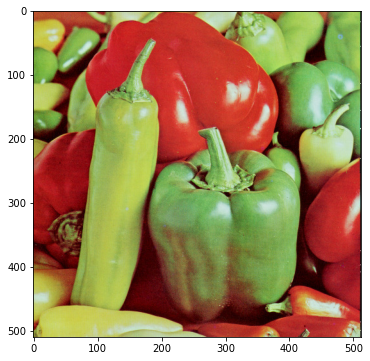

In [3]:
plt.figure(figsize=(8,6))
plt.imshow(I0)

## check the size of the input image

In [4]:
I0.shape

(510, 512, 3)

In [5]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0] # 이미지의 row
num_column  = I0.shape[1] # color = width
num_channel = I0.shape[2] # channel = depth
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel   

- 3개의 채널을 1개로 바꾸는 것이다. r,g,b 채널이 있을 때 이것을 하나의 채널을 갖는 matrix로 변환해본다. 여기에서 제시된 것은 average를 구하는 것이다. 채널 방향으로 average를 하면 모든 pixel에 $gr = (r + g + b) / 3$ 이다.

In [6]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = np.mean(I0, axis = 2)
# The axis=2 argument tells numpy.mean() 
# to average values across all three color channels.
    

num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  510
number of columns of I =  512


In [38]:
I.shape

(510, 512)

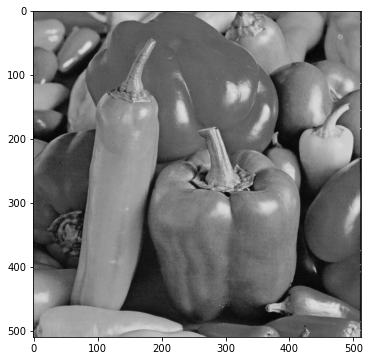

In [45]:
plt.figure(figsize=(8,6))
plt.imshow(I, cmap='gray') # cmap을 설정해야 색이 제대로 나옴

## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0   

- 2차원 matrix의 값을 0~1 사이로 normalize 하기. 현재 i인데, 최소값은 0, 최대값은 1이 되게 만들기!

In [51]:
print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  254.66666666666666
minimum value of I =  0.0


In [7]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = I/255

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  0.9986928104575163
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction   

* 현재 2차원 matrix가 되고, (x,y)가 있으며 각 픽셀의 값은 I[x,y]가 된다. 이는 픽셀의 intensity 값이 된다. 우리는 2가지 방향에 대해 미분을 할 수 있게 된다.   

- for문을 이용하면 너무 느리므로 forward의 경우 shift해서 주어진 matrix에 대해 roll해서 한번에 빼면 모든 픽셀에서의 기울기를 구할 수 있다.

- forward difference : $ I[x+1, y] - I[x, y] $

### Example

In [19]:
x = np.arange(10)
x2 = np.reshape(x, (2, 5))

In [21]:
x2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [52]:
x2_1 = np.roll(x2, -1, axis =1)
x2_1

array([[1, 2, 3, 4, 0],
       [6, 7, 8, 9, 5]])

In [53]:
print(x2_1[:,0], x2[:,1])

[1 6] [1 6]


In [58]:
x2_1[:,4] = x2_1[:,3]
x2_1

array([[1, 2, 3, 4, 4],
       [6, 7, 8, 9, 9]])

https://numpy.org/doc/stable/reference/generated/numpy.roll.html

In [9]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape) # row가 x, column이 y
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 
    
    IxPlusOne = np.roll(I, -1, axis=1)
    IxPlusOne[:, 511] = IxPlusOne[:, 510]
    D = IxPlusOne - I

    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

### Example

In [62]:
x2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [65]:
x2_2 = np.roll(x2, 1, axis =1)
x2_2

array([[4, 0, 1, 2, 3],
       [9, 5, 6, 7, 8]])

In [66]:
x2_2[:,1]

array([0, 5])

In [67]:
x2_2[:,0] = x2_2[:,1]
x2_2

array([[0, 0, 1, 2, 3],
       [5, 5, 6, 7, 8]])

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [10]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    IxMinusOne = np.roll(I, 1, axis=1)
    IxMinusOne[:, 0] = IxMinusOne[:, 1]
    D = I - IxMinusOne
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [11]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    IxPlusOne = np.roll(I, -1, axis=1)
    IxPlusOne[:, 511] = IxPlusOne[:, 510]
    IxMinusOne = np.roll(I, 1, axis=1)
    IxMinusOne[:, 0] = IxMinusOne[:, 1]

    D = 1/2 * (IxPlusOne - IxMinusOne)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction   

- 어떤 함수 $f(x,y)$가 주어졌을 때 이에 대한 gradient는 f를 x축, y축으로 미분 한 것에 대한 벡터이다. 그런데 이것의 $L_2^2$ norm은 우리가 L2 norm square을 구할 때 $a^2 + b^2$ 처럼 gradient는 위 식과 같이 구할 수 있다.   

- 주의할 점은 **boundary condition**. 예를 들어 forward difference에서 다음 픽셀 값이 없을 때, 이 경우 픽셀 값이 같다고 가정한다. 즉 앞서 언급한 3가지 미분하는 모든 방법에서 이전 혹은 다음 픽셀 등이 없을 때 인접한 값과 동일하다고 보는 것이다. 이를 Newman boundary condition 이라고 한다. 이를 적용해서 구해야 한다.   

### Example

In [77]:
x = np.arange(0,12)
x = x.reshape(3,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [78]:
x3_1 = np.roll(x, -1, axis = 0)
x3_1

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3]])

In [80]:
x3_1[2,:] = x3_1[1,:]
x3_1

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 8,  9, 10, 11]])

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [81]:
I.shape

(510, 512)

In [12]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape) # I가 들어왔을 때 difference 구해서 D에 assign하고 return
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    IyPlusOne = np.roll(I, -1, axis = 0)
    IyPlusOne[509,:] = IyPlusOne[508,:]
    D = IyPlusOne - I
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

### Example

In [84]:
x3_2 = np.roll(x, 1, axis = 0)
x3_2[0,:] = x3_2[1,:]
x3_2

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [13]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    IyMinusOne = np.roll(I, 1, axis = 0)
    IyMinusOne[0,:] = IyMinusOne[1,:]
    D = I - IyMinusOne
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [14]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    IyPlusOne = np.roll(I, -1, axis = 0)
    IyPlusOne[509,:] = IyPlusOne[508,:]

    IyMinusOne = np.roll(I, 1, axis = 0)
    IyMinusOne[0,:] = IyMinusOne[1,:]

    D = 1/2 * (IyPlusOne - IyMinusOne)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $   

- norm of the gradient 구할 때에는 세 가지 경우 중 central difference를 활용한 x,y 축 미분을 고려한다. 이를 제곱해서 픽셀마다 더한다. 그 값을 리턴한다.

In [36]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    norm_gradient = np.sqrt((compute_derivative_x_central(I))**2 + (compute_derivative_y_central(I))**2)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

In [37]:
print(compute_norm_gradient_central(I))

[[0.01807754 0.01549447 0.02133964 ... 0.02095584 0.26870695 0.24904105]
 [0.02222222 0.02727143 0.01872751 ... 0.0255655  0.27058824 0.25882435]
 [0.02442032 0.01834728 0.01582185 ... 0.02902432 0.28309784 0.24967406]
 ...
 [0.00381108 0.01542539 0.04126456 ... 0.01201619 0.33053678 0.37060898]
 [0.02594697 0.01141454 0.0458682  ... 0.01966223 0.37672695 0.34082633]
 [0.01063975 0.01881854 0.01531422 ... 0.02779123 0.35210989 0.32091769]]


___

___

## functions for presenting the results

___

___

코드를 작성할 필요가 없다. 제시된 대로 확인하기

In [16]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [17]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [18]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [19]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [20]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [21]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [22]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [23]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [24]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [25]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [26]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [27]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [28]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [30]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [31]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [32]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [33]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


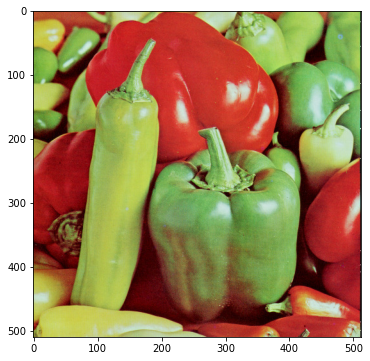

**************************************************
## [RESULT 02]
**************************************************


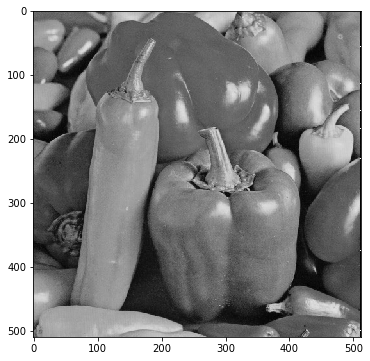

**************************************************
## [RESULT 03]
**************************************************


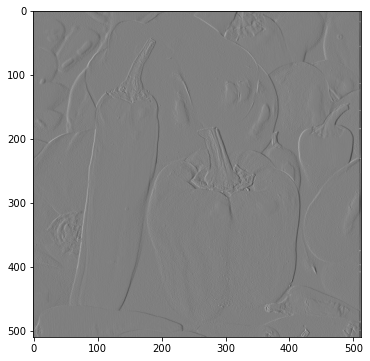

**************************************************
## [RESULT 04]
**************************************************


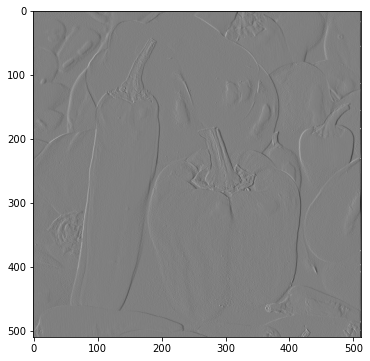

**************************************************
## [RESULT 05]
**************************************************


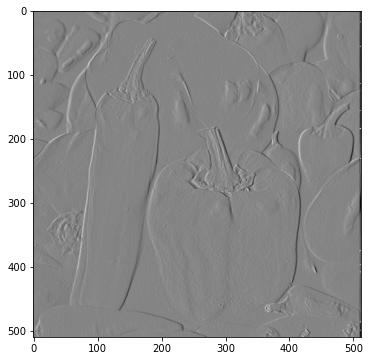

**************************************************
## [RESULT 06]
**************************************************


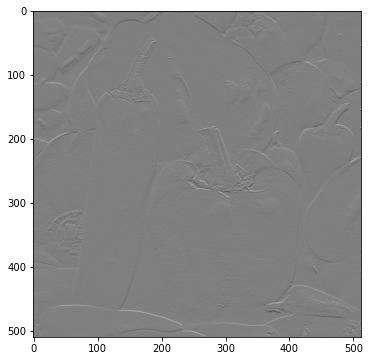

**************************************************
## [RESULT 07]
**************************************************


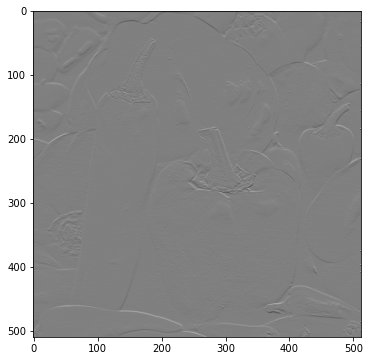

**************************************************
## [RESULT 08]
**************************************************


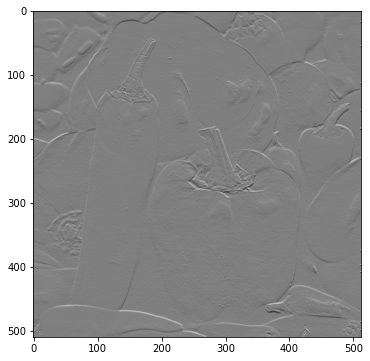

**************************************************
## [RESULT 09]
**************************************************


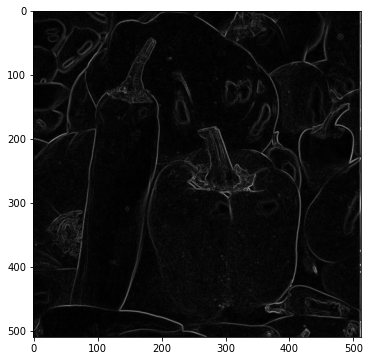

**************************************************
## [RESULT 10]
**************************************************


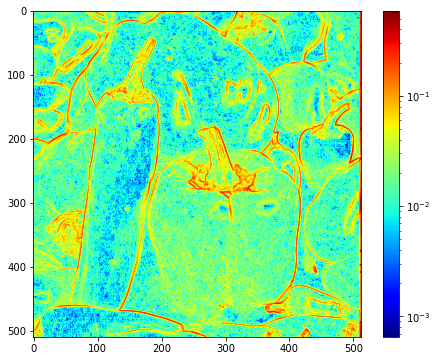

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.035294117647058865
value2 =  0.0
value3 =  -0.016993464052287577
value4 =  0.0
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  -0.6418300653594771
value3 =  0.009150326797385588
value4 =  0.007843137254901933
**************************************************
## [RESULT 13]
**************************************************
value1 =  -0.017647058823529432
value2 =  -0.32091503267973853
value3 =  -0.003921568627450994
value4 =  0.0039215686274509665
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.007843137254901988
value2 =  0.0
value3 =  -0.005228758169934622
value4 =  0.011764705882352955
**************************************************
## [RESULT 15]
********************************

In [38]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)